(3, 3)
[[0.]
 [0.]
 [0.]]
initial ahat [[-1.09476566  2.63074989 -2.07779987]
 [-0.97888096 -0.3557859  -0.13578533]
 [-0.02168379 -1.29471315  0.07327684]]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


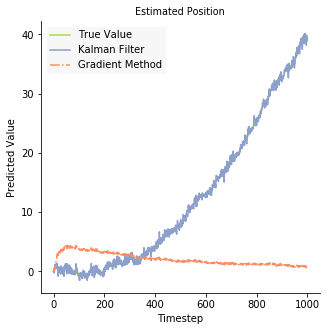

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


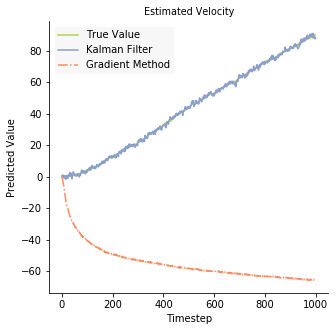

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


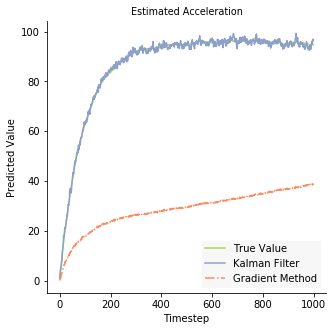

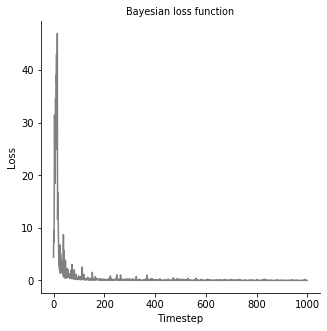

In [15]:
!pip install brewer2mpl
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mp
import scipy.linalg as LA
import brewer2mpl
import seaborn as sns

bmap = brewer2mpl.get_map("Set2", 'qualitative',7)
colors = bmap.mpl_colors

params = {
   'axes.labelsize': 8,
   'font.size': 8,
   'legend.fontsize': 10,
   'xtick.labelsize': 10,
   'ytick.labelsize': 10,
   'text.usetex': False,
   'figure.figsize': [5, 5],
   'font.family': 'sans-serif'
   }
mp.rcParams.update(params)


dt = 0.001
A = np.array([[1, dt, 0.5 * dt**2],
     [0,1,dt],
     [0,0,1]])
x = np.array([0,0,0]).reshape(3,1)
#C = np.identity(3)
C = np.random.normal(0,1,[3,3])
print(C.shape)
print(np.dot(A,x))
def u_fun(t):
  return np.exp(-0.01 * t)

us = []
xs = []
ys = []
B = np.array([0,0,1]).reshape(3,1)

xhat = np.array([0.0,0.0,0.0]).reshape(3,1)
phat = np.identity(3)
Q = np.identity(3)
R = np.identity(3)
xhats = []
phats = []
xhat_grad = xhat
phat_grad = np.copy(phat)
xhat_grads = []
Ahat = np.random.normal(0,1,[3,3])
#Chat = C + np.random.normal(0,0.0001,[3,3])
Chat =np.random.normal(0,1,[3,3])
Bhat = np.random.normal(0,1,[3,1])
Ls = []
print("initial ahat", Ahat)
N=1000
cov_diffs = []
phat_abs = []
phat_grad_abs = []
for i in range(N):
  u = u_fun(i)
  x = np.dot(A,x) + np.dot(B,u) + np.random.normal(0,0.1,[3,1])
  y = np.dot(C, x) + np.random.normal(0,1,[3,1])
  xhat_proj = np.dot(A,xhat) + np.dot(B,u)
  phat_proj = np.dot(A, np.dot(phat, A.T)) + Q
  K = np.dot(np.dot(phat_proj, C.T), LA.inv(np.dot(np.dot(C,phat_proj),C.T) + R))
  xhat = xhat_proj + np.dot(K, y - np.dot(C,xhat_proj))
  phat = phat_proj - np.dot(K, np.dot(C, phat_proj))
  for i in range(20):
    ex = xhat_grad - (np.dot(A, xhat_grad) + np.dot(B,u))
    ey = y - np.dot(Chat, xhat_grad)
    dldmu = np.dot(phat_grad, ex) - np.dot(Chat.T, np.dot(R, ey))
    xhat_grad -= (0.01 * dldmu)

    #Ahat_grad=   np.dot(phat_grad,np.dot(ex.reshape(3,1), xhat_grad.reshape(3,1).T))
    #Ahat += 0.00001 * Ahat_grad
    #Bhat_grad =  np.dot(ex.reshape(3,1), np.array(u).reshape(1,1).T)
    #Bhat += 0.0001 * Bhat_grad
    Chat_grad =  np.dot(np.dot(xhat_grad.reshape(3,1), ey.reshape(3,1).T),R.T)
    Chat += 0.00002 * Chat_grad.T
  L = np.sum(np.square(ey) + np.square(ex))
  Ls.append(L)
  cov_diffs.append(np.sum(np.square(phat_grad - phat)))
  phat_abs.append(np.sum(np.square(phat)))
  phat_grad_abs.append(np.sum(np.square(phat_grad)))

  xs.append(x)
  us.append(u)
  ys.append(y)
  xhats.append(xhat)
  phats.append(phat)
  xhat_grads.append(np.copy(xhat_grad))


def plot_graph(xs, xhats, xhat_grads, title):
  plt.plot(xs,label="True Value",color=colors[4])
  plt.plot(xhats, label="Kalman Filter",color=colors[2])
  plt.plot(xhat_grads, label="Gradient Method", linestyle='-.',color=colors[1])
  plt.title(title)
  leg = plt.legend()
  f = leg.get_frame()
  f.set_edgecolor('1')
  f.set_facecolor('0.96')
  plt.xticks(np.arange(0,1010,200))
  plt.xlabel('Timestep',fontsize=10)
  plt.ylabel("Predicted Value",fontsize=10)
  sns.despine(left=False,top=True, right=True, bottom=False)
  plt.savefig(title + "_C_matrix.eps", format="eps")
  plt.show()

def plot_loss_graph(Ls):
  plt.plot(Ls,color="gray")
  plt.title("Bayesian loss function")
  plt.xlabel("Timestep",fontsize=10)
  plt.ylabel("Loss",fontsize=10)
  plt.xticks(np.arange(0,1010,200))
  sns.despine(left=False,top=True, right=True, bottom=False)
  plt.savefig("NKF_C_matrix_loss.eps", format="eps")
  plt.show()



xs = np.array(xs)
xhats = np.array(xhats)
xhat_grads = np.array(xhat_grads)
ys = np.array(ys).reshape(N,3)

plot_graph(xs[:,0], xhats[:,0], xhat_grads[:,0], "Estimated Position")
plot_graph(xs[:,1], xhats[:,1], xhat_grads[:,1], "Estimated Velocity")
plot_graph(xs[:,2], xhats[:,2], xhat_grads[:,2], "Estimated Acceleration")

plot_loss_graph(Ls)

In [16]:
!ls
from google.colab import files
files.download("Estimated Acceleration_C_matrix.eps")
files.download("Estimated Velocity_C_matrix.eps")
files.download("Estimated Position_C_matrix.eps")
files.download("NKF_C_matrix_loss.eps")

'Estimated Acceleration_C_matrix.eps'   NKF_C_matrix_loss.eps
'Estimated Position_C_matrix.eps'       sample_data
'Estimated Velocity_C_matrix.eps'
